In [1]:
import os
os.chdir('/home/akhilbvs/Kaggle/google-play-store-apps')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
plotly.offline.init_notebook_mode(connected=True)

In [3]:
np.warnings.filterwarnings('ignore')

In [4]:
apps=pd.read_csv('googleplaystore.csv')

In [5]:
apps.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
apps.drop_duplicates(subset='App',inplace=True)

In [7]:
apps=apps[apps['Android Ver']!='Nan']
apps=apps[apps['Installs']!='Free']
apps=apps[apps['Installs']!='Paid']

In [8]:
print('Total number of apps in data set:',len(apps))

Total number of apps in data set: 9659


In [65]:
apps['Size'] = apps['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

apps['Size'] = apps['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
apps['Size'] = apps['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
apps['Size'] = apps['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


In [66]:
apps['Size'] = apps['Size'].apply(lambda x: float(x))
apps['Installs'] = apps['Installs'].apply(lambda x: float(x))

apps['Price'] = apps['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
apps['Price'] = apps['Price'].apply(lambda x: float(x))

apps['Reviews'] = apps['Reviews'].apply(lambda x: int(x))

In [24]:
apps['Installs'] = apps['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
apps['Installs'] = apps['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
apps['Installs'] = apps['Installs'].apply(lambda x: int(x))

In [12]:
apps_same_category=apps['Category'].value_counts().sort_values(ascending=True)

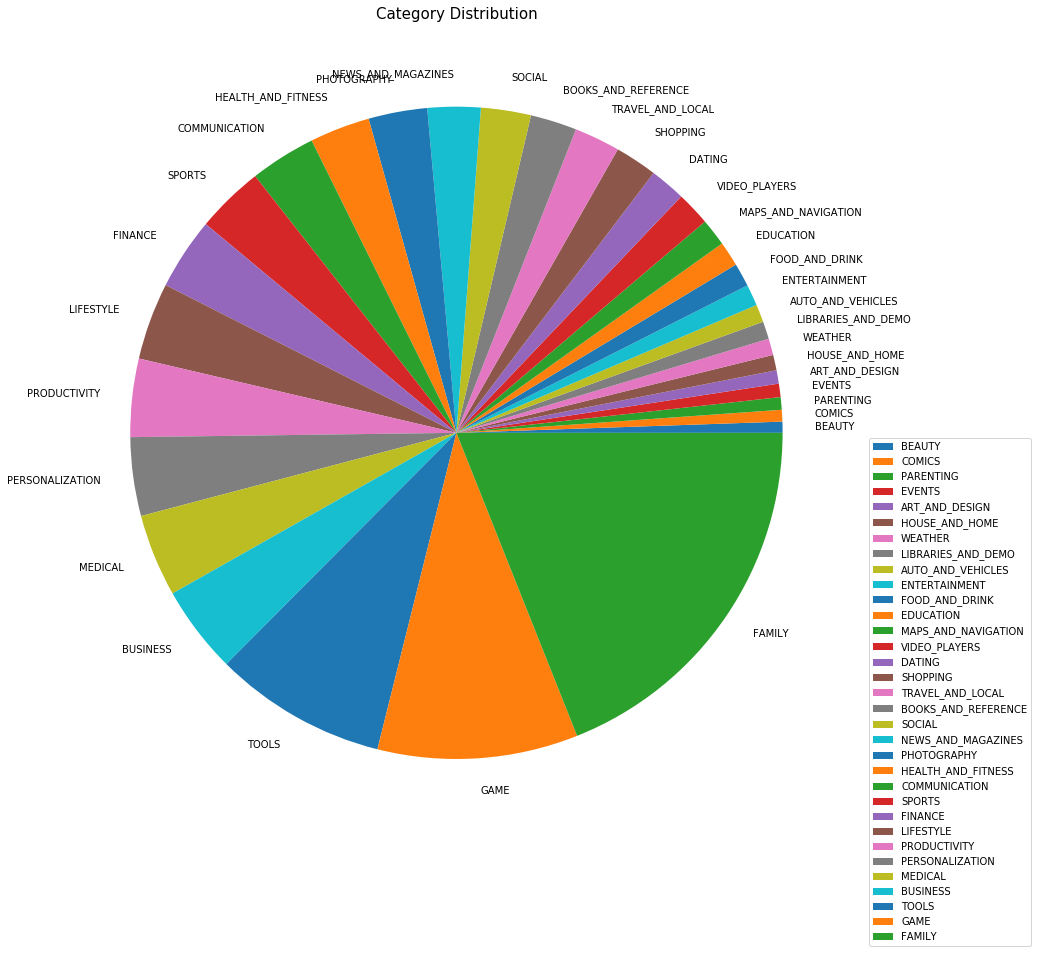

In [13]:
plt.figure(figsize=(25,15))
plt.pie(x=apps_same_category.values,labels=apps_same_category.index,)
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.title('Category Distribution',size=15)
plt.show()

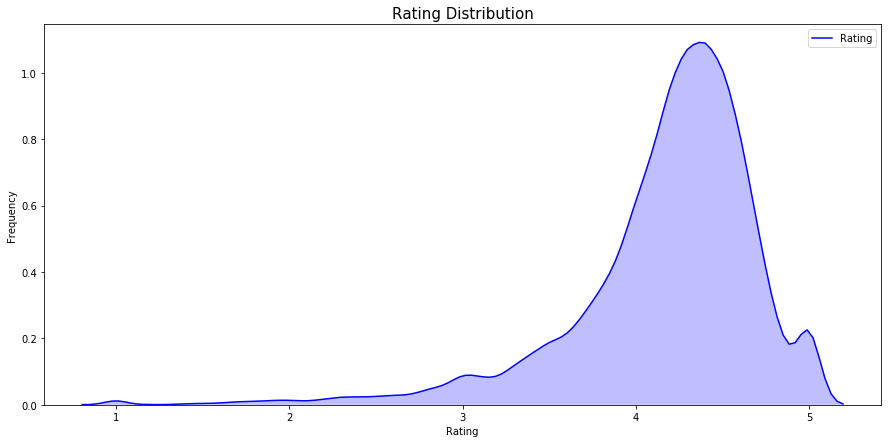

In [14]:
plt.figure(figsize=(15,7))
sns.kdeplot(apps.Rating,color='Blue',shade=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution',size=15)
plt.show()

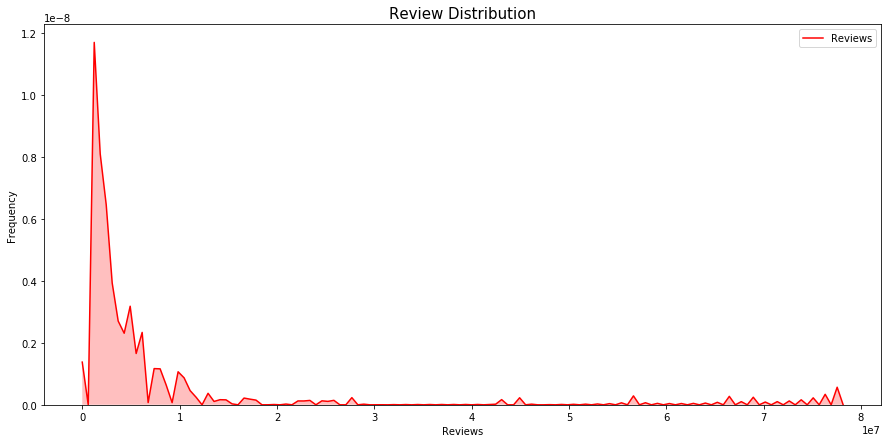

In [15]:
plt.figure(figsize=(15,7))
sns.kdeplot(data=apps.Reviews,color='Red',shade=True)
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Review Distribution',size=15)
plt.show()

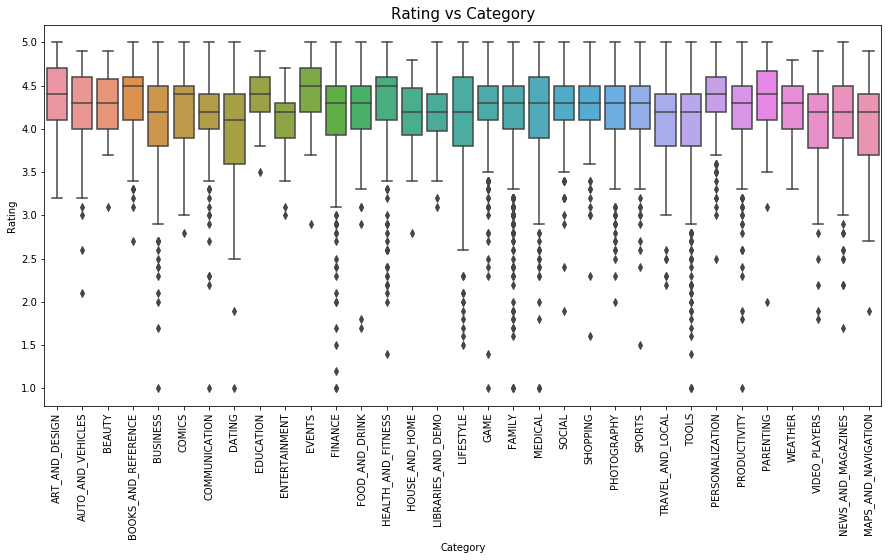

In [17]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Category',y='Rating',data=apps)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title("Rating vs Category",size=15)
plt.show()

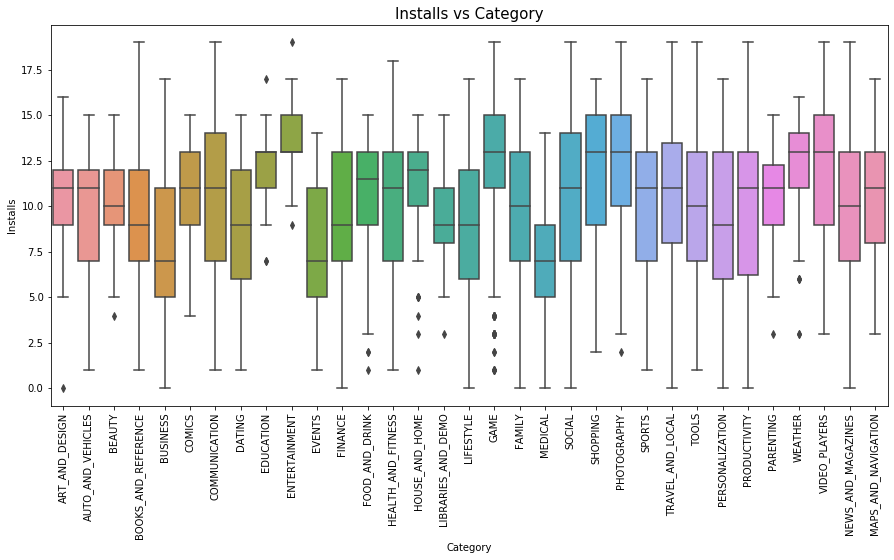

In [55]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Category',y='Installs',data=apps)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Installs')
plt.title("Installs vs Category",size=15)
plt.show()

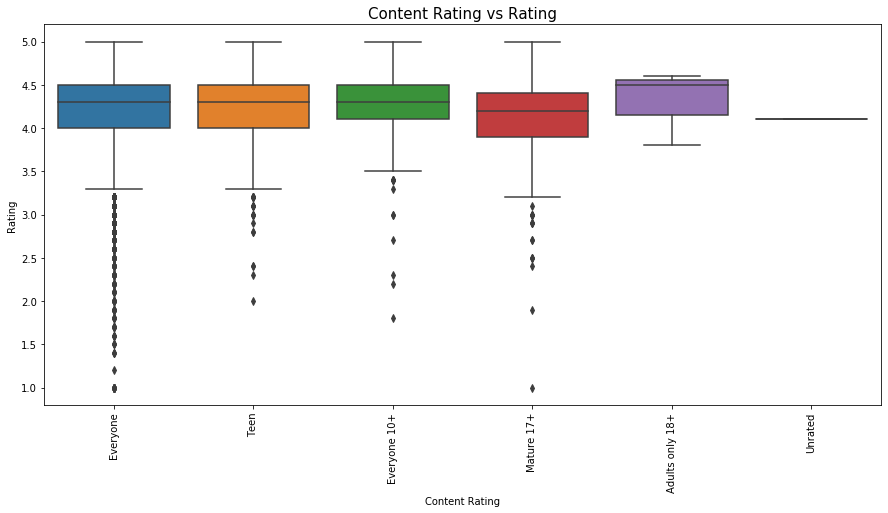

In [58]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Content Rating',y='Rating',data=apps)
plt.xticks(rotation=90)
plt.title('Content Rating vs Rating',size=15)
plt.show()

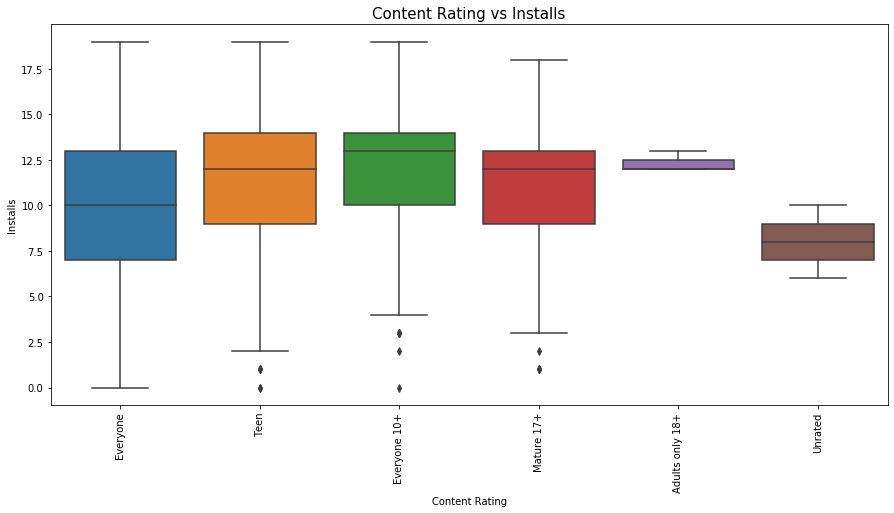

In [72]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Content Rating',y='Installs',data=apps)
plt.xticks(rotation=90)
plt.title('Content Rating vs Installs',size=15)
plt.show()

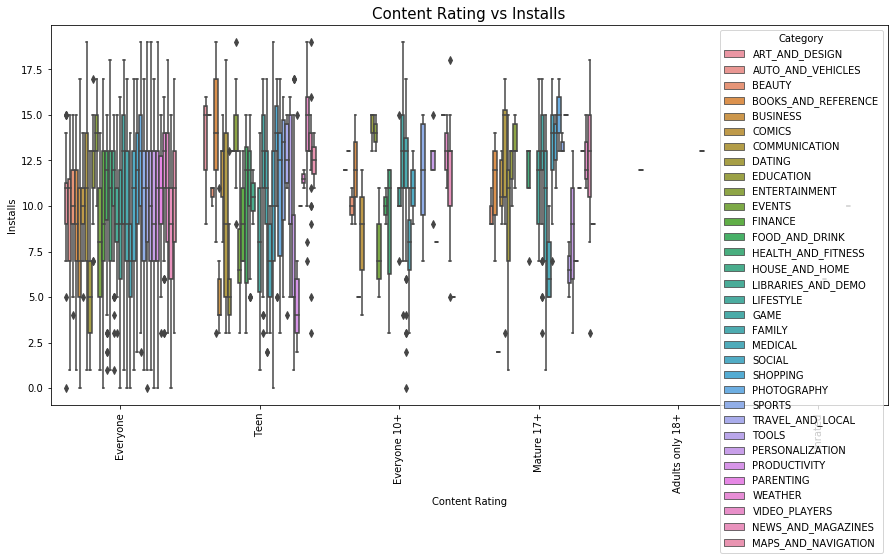

In [73]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Content Rating',y='Installs',hue='Category',data=apps)
plt.xticks(rotation=90)
plt.title('Content Rating vs Installs',size=15)
plt.show()

In [25]:
apps['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [26]:
apps['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [27]:
Sorted_value = sorted(list(apps['Installs'].unique()))

In [29]:
apps['Installs'].replace(Sorted_value,range(0,len(Sorted_value),1), inplace = True )

In [34]:
apps['Installs'].head()

0     9
1    12
2    14
3    16
4    11
Name: Installs, dtype: int64

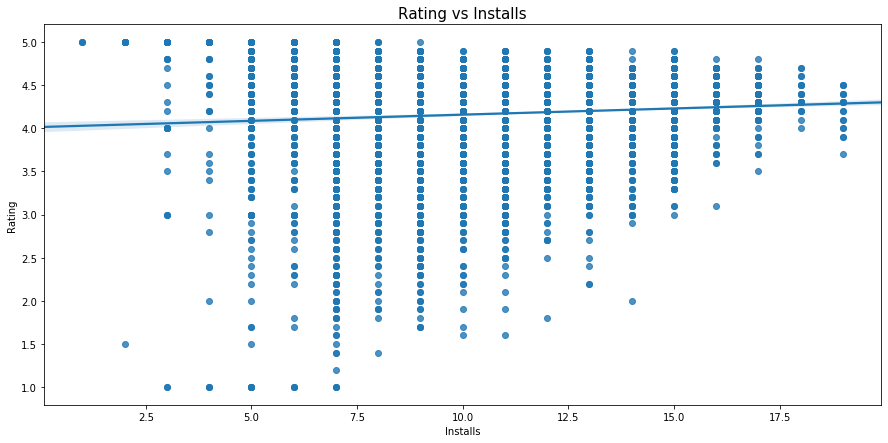

In [33]:
plt.figure(figsize=(15,7))
sns.regplot(x='Installs',y='Rating',data=apps)
plt.title('Rating vs Installs',size=15)
plt.show()

<Figure size 1080x504 with 0 Axes>

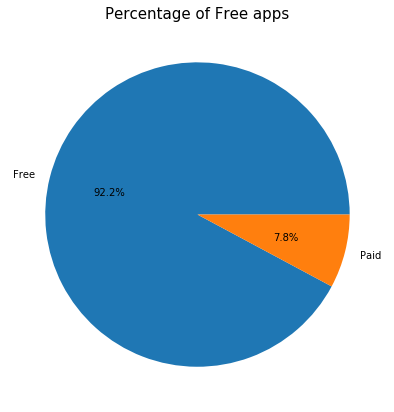

In [35]:
plt.figure(figsize=(15,7))
app_type=apps['Type'].value_counts(sort=True)
plt.figure(figsize=(15,7))
plt.pie(x=app_type,labels=app_type.index,autopct='%1.1f%%')
plt.title('Percentage of Free apps',size=15)
plt.show()

In [37]:
apps['Price'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [45]:
apps['Price'].value_counts().head()

0.00    8903
0.99     145
2.99     124
1.99      73
4.99      70
Name: Price, dtype: int64

In [47]:
apps[apps['Price']==0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000,9,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000,12,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700,14,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000,16,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800,11,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.600,10,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.000,10,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.000,13,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.000,13,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.100,9,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [48]:
apps[apps['Price']==400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,9,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


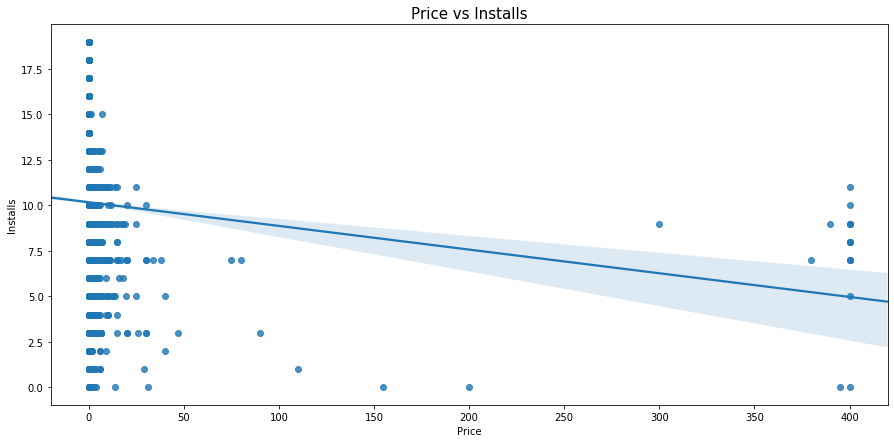

In [52]:
plt.figure(figsize=(15,7))
sns.regplot(x='Price',y='Installs',data=apps)
plt.title('Price vs Installs',size=15)
plt.show()

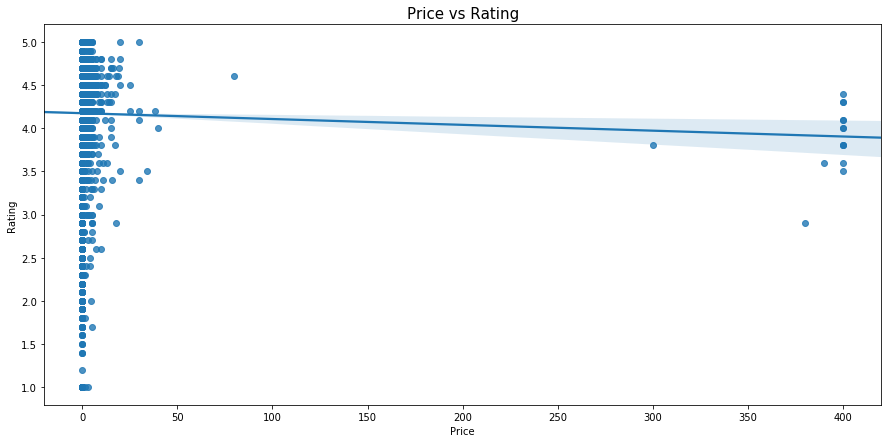

In [60]:
plt.figure(figsize=(15,7))
sns.regplot(x='Price',y='Rating',data=apps)
plt.title('Price vs Rating',size=15)
plt.show()

In [74]:
apps.loc[apps['Price']==0,'Price Category']='Free'
apps.loc[(apps['Price']>0)&(apps['Price']<=1),'Price Category']='Category 1'
apps.loc[(apps['Price']>1)&(apps['Price']<=5),'Price Category']='Category 2'
apps.loc[(apps['Price']>5)&(apps['Price']<=10),'Price Category']='Category 3'
apps.loc[(apps['Price']>10)&(apps['Price']<=15),'Price Category']='Category 4'
apps.loc[(apps['Price']>15)&(apps['Price']<=30),'Price Category']='Category 5'
apps.loc[(apps['Price']>30),'Price Category']='Category 6'

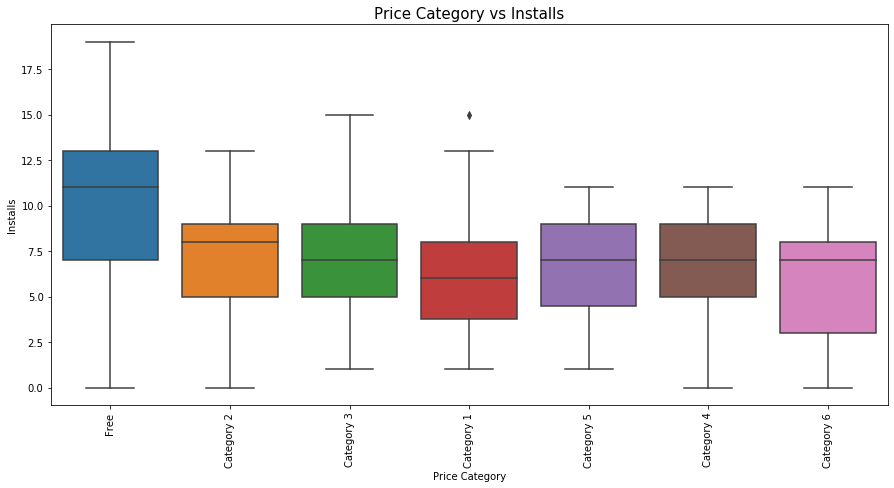

In [79]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Price Category',y='Installs',data=apps)
plt.xticks(rotation=90)
plt.title('Price Category vs Installs',size=15)
plt.show()

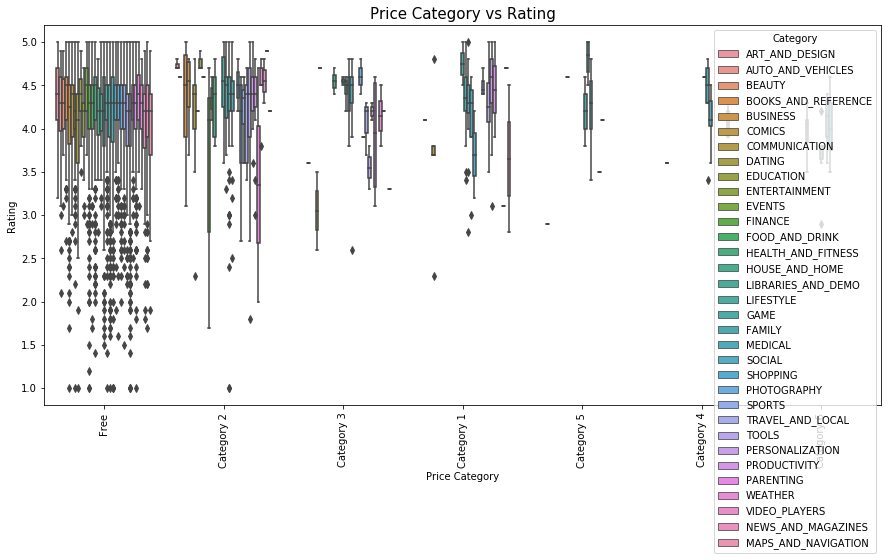

In [83]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Price Category',y='Rating',hue='Category',data=apps)
plt.xticks(rotation=90)
plt.title('Price Category vs Rating',size=15)
plt.show()

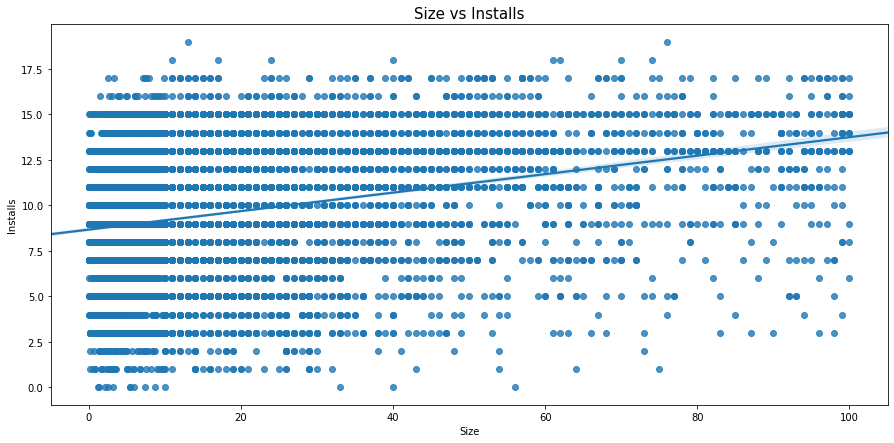

In [84]:
plt.figure(figsize=(15,7))
sns.regplot(x='Size',y='Installs',data=apps)
plt.title('Size vs Installs',size=15)
plt.show()

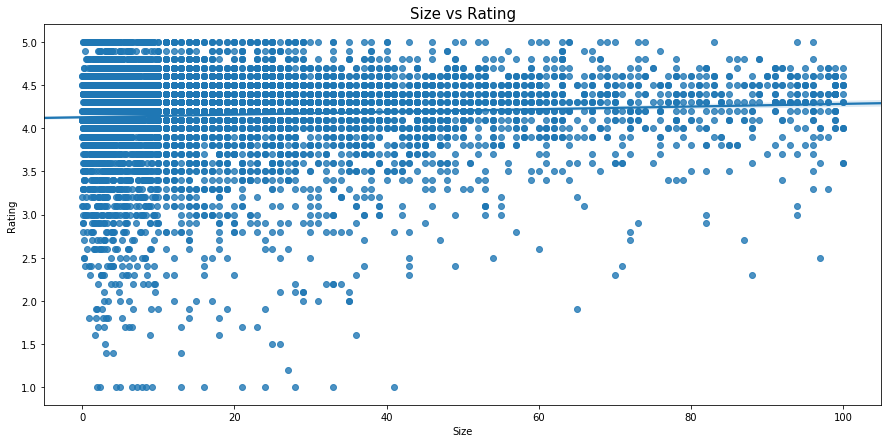

In [85]:
plt.figure(figsize=(15,7))
sns.regplot(x='Size',y='Rating',data=apps)
plt.title('Size vs Rating',size=15)
plt.show()